# Project 1: Understanding and Training Regression Models

### Name: Steve Nathan de Sa
### Course Level: CSC 448

**Introduction:**
* In this project, we explore the application of regression in analyzing and modeling relationships between input variables.

**Objectives:**
* The objective of this project is to implement different regression models to analyze real-world datasets, understand the relationship between variables, and make predictions.  Additionally, students will gain experience understanding optimization techniques (gradient descent, stochastic gradient descent, and so-called ``normal equations" to learn model parameter selection).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* The first problem we aim to analyze is a model similar to our class model of predicting how an audience might feel about a movie rating given the critic's score of the movie.  To get started, download the MovieData.csv file from the D2L project page.  This file contains an ordered pair $\mathcal{D} = \{(x^{(i)},t^{(i)})  \}$ for $i = 1,2,\dots,N$ samples.  Each pair represents a training example for the problem of interest.

**Problem A**

1. Let's plot the data to get an idea of what we're dealing with (be sure to label all axis ``critic vs. audience", and give the plot a title of your choosing).

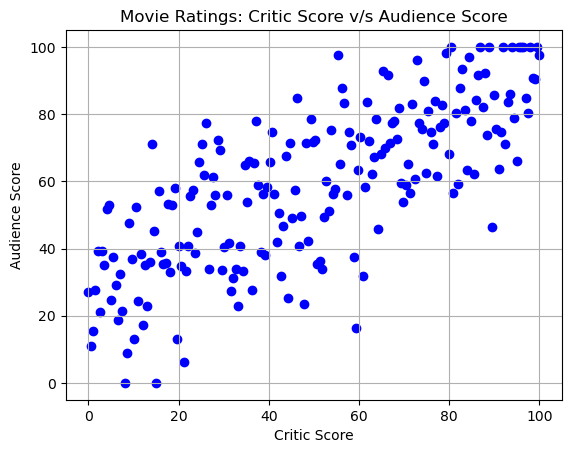

In [2]:
# Read in the data
dataset1 = pd.read_csv("MovieData.csv")
x1 = dataset1.iloc[:, 0].values
t1 = dataset1.iloc[:, 1].values

# Plot data
plt.scatter(x1, t1, color="blue")
plt.title("Movie Ratings: Critic Score v/s Audience Score")
plt.xlabel("Critic Score")
plt.ylabel("Audience Score")
plt.grid(True)
plt.show()

2. Next, write a function to computer the mean square error between two inputs (t_target,y_predicted)

In [3]:
def MSE(t_target, y_predicted):
    return np.mean((t_target - y_predicted)**2)

3. Next write a function (called GradDescent)to learn the model parameters using gradient descent. 
    - The function will take as input, the target values, input values, and learning rate.
    - The function will return the model parameters.

**Note**  
* You should assume the model takes the form (to generalize when we have more than a single input, e.g., the next problem will require fitting a more complex model to the data instead of a simple line)
$$
    y = w_0 + \sum_{j=1}^M w_j x_j
$$

In [4]:
def GradDescent(t_target, x_input, l_learning_rate):
    N = len(x_input)
    X = np.c_[np.ones(N), x_input]  # Add bias term
    w = np.zeros(X.shape[1])  # Initialize weights
    max_epochs = 100000 # Max number of iterations
    tolerance = 1e-6 # Threshold for stopping when the gradient is small enough
    
    for _ in range(max_epochs):
        y_pred = X @ w  # Compute predictions
        gradient = -(2/N) * X.T @ (t_target - y_pred)  # Compute gradient
        
        # Update weights with a small threshold to avoid instability
        w -= l_learning_rate * np.clip(gradient, -1, 1)
        
        # Check for convergence
        if np.linalg.norm(gradient) < tolerance:
            break
    
    return w

4. Next, we learned in class that for linear models, we could use an analytic solution of the form:
$$
    \textbf{w} = (X^T X)^{-1} X^T \textbf{t}
$$
where $X$ and $\textbf{t}$ are constructed as shown in class.  Write a function similar to the funciton in A.3 called LinRegression with input parameters $X$ and $\textbf{t}$ that returns the model weights.

In [5]:
def LinRegression(X,t):
    return np.linalg.pinv(X.T @ X) @ X.T @ t

5. Using both function in problem A.3 and A.4, verify that the model parameters do indeed converge to the same values regardless of which method you use by plotting the original data, with two different lines on top: one for the gradient descent, and one for the analytic solution.
    - Be sure to label all your plots and include a legend to distinguish between the scatter plot of original samples, and both line plots for your estimated model.

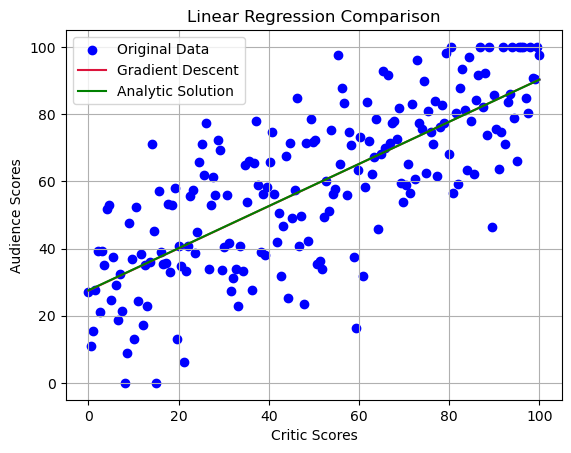

In [11]:
# Prepare data for regression
X = np.c_[np.ones(len(x1)), x1]
learning_rate = 0.001

w_analytic = LinRegression(X, t1)
w_gd = GradDescent(t1, x1, learning_rate)

# Plot data with regression lines
plt.scatter(x1, t1, label="Original Data", color="blue")
x_line = np.linspace(min(x1), max(x1), 100)
y_gd = w_gd[0] + w_gd[1] * x_line
y_analytic = w_analytic[0] + w_analytic[1] * x_line
plt.plot(x_line, y_gd, label="Gradient Descent", color="crimson")
plt.plot(x_line, y_analytic, label="Analytic Solution", color="green")
plt.xlabel("Critic Scores")
plt.ylabel("Audience Scores")
plt.title("Linear Regression Comparison")
plt.grid(True)
plt.legend()
plt.show()

# Note: The gradient descent and the analytical solution yield similar regression lines.

6. To ensure the method for learning the model parameters is able to generalize well, splot the data into an 80/20 data ratio.  You'll then train your model on the 80% of the data, and test your model on the remaining 20%.  **Note: you'll want to do this randomly, e.g., randomly grab 80%, then use the remaining 20% for testing**
    - Using the MSE function above, compute the MSE for the test set (normally we'd use 5-fold cross validation, but we'll get to that later).  You can use either method you choose for model validation, but I'd recommend using the analytic solution here.

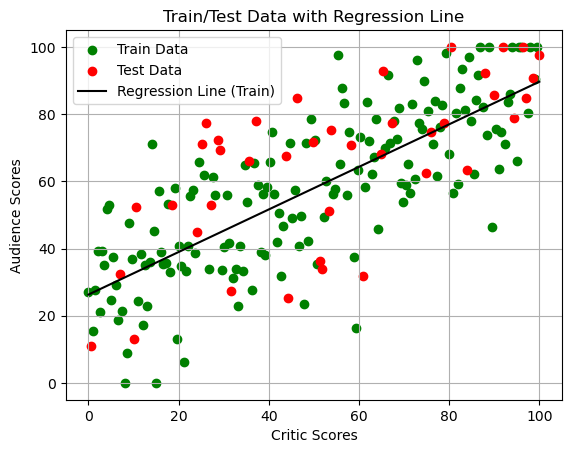

Test Set MSE: 327.2464751288787


In [10]:
# Train/test split for validation
np.random.seed(42)
indices = np.random.permutation(len(x1))
train_size = int(0.8 * len(x1))
train_indices, test_indices = indices[:train_size], indices[train_size:]
X_train, t_train = X[train_indices], t1[train_indices]
X_test, t_test = X[test_indices], t1[test_indices]

# Train model using analytic solution
w_train = LinRegression(X_train, t_train)
y_pred_test = X_test @ w_train

# Plot train and test data and regression line
plt.scatter(X_train[:, 1], t_train, label="Train Data", color="green")
plt.scatter(X_test[:, 1], t_test, label="Test Data", color="red")
x_line = np.linspace(min(x1), max(x1), 100)
y_train_pred = w_train[0] + w_train[1] * x_line
plt.plot(x_line, y_train_pred, label="Regression Line (Train)", color="black")
plt.xlabel("Critic Scores")
plt.ylabel("Audience Scores")
plt.title("Train/Test Data with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

# Compute MSE on test set
test_mse = MSE(t_test, y_pred_test)
print(f"Test Set MSE: {test_mse}")

**Problem B**
1. Let's up the complexity a bit.  Download the second .csv file called HousingData.  This data contains housing prices (x1000) as a function of both size and year built.  Plot the data to get an idea of what we're dealing with (again, don't forget your axis labels)

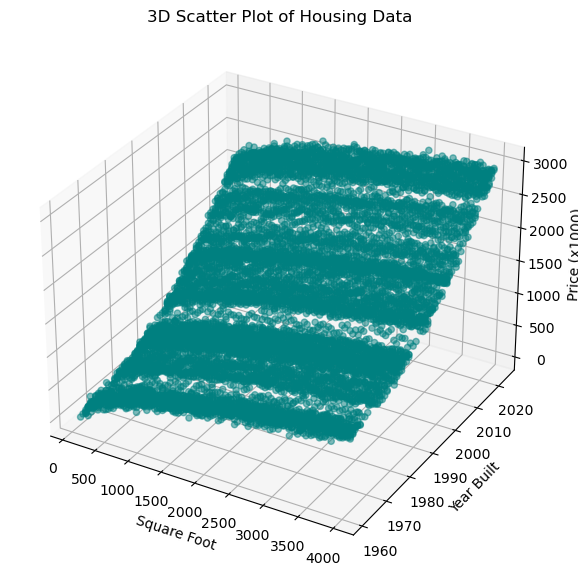

In [12]:
# Extracting data
dataset2 = pd.read_csv("3DHousingData.csv")
X1 = dataset2.iloc[:, 0].values  # Square Foot
X2 = dataset2.iloc[:, 1].values  # Year Built
Y = dataset2.iloc[:, 2].values.reshape(-1, 1)  # Price

# 3D data plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color="teal", marker='o', alpha=0.5)
ax.set_xlabel("Square Foot")
ax.set_ylabel("Year Built")
ax.set_zlabel("Price (x1000)")
ax.set_title("3D Scatter Plot of Housing Data")
plt.show()

2. Assuming a linear model of the form $y = w_0 + w_1 x_1 + w_2 x_2$, use either methods described above to learn the model paramters for the model.

In [13]:
# Compute model parameters for linear model
X_housing = np.column_stack((np.ones(X1.shape), X1, X2))
w_linear = LinRegression(X_housing, Y)

print(f"Learned model parameters: w0={w_linear[0][0]:.2f}, w1={w_linear[1][0]:.2f}, w2={w_linear[2][0]:.2f}")

Learned model parameters: w0=-64835.13, w1=0.19, w2=33.01


3. To investigate the model fit, let's plot the model surface along with the original data.

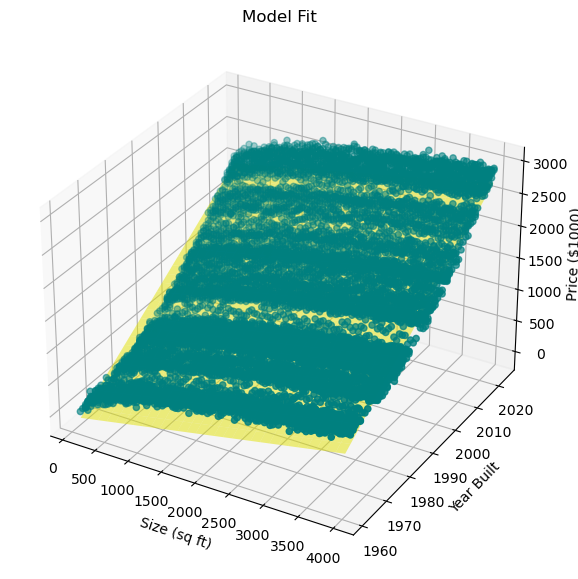

In [14]:
# Generate meshgrid for surface plot
X1_range = np.linspace(min(X1), max(X1), 30)
X2_range = np.linspace(min(X2), max(X2), 30)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
Y_pred = w_linear[0] + w_linear[1] * X1_mesh + w_linear[2] * X2_mesh

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, marker='o', color='teal', label="Actual Data")
ax.plot_surface(X1_mesh, X2_mesh, Y_pred, color='yellow', alpha=0.5)
ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Year Built')
ax.set_zlabel('Price ($1000)')
ax.set_title('Model Fit')
plt.show()

**Problem C**
* In Problem B, you assumed a linear model to fit the data, however, after further analysis of the data, you realized that a linear fit doesn't do a great job for this particular dataset.  Let's up the model complexity a bit to see if we can reduce the overall error in our model.
    - As a "guess", let's assume the model is given by $y = w_0 + w_1 \sqrt{(x_1 - 100)} + w_2 (x_2 - 1960)^2$
    - Using this model, learn the model parameters to minimize the MSE (hint: you can use the analytic solution with proper choice of $X$)
    - Plot the new model, along with the original data (as a surface plot) to illustrate the fit.
    - Compare the MSE you get using the more complex model with the linear model you assumed in Problem B.

MSE for the Linear Model: 30171.90
MSE for the Complex Model: 2476.08
Verdict: The complex model performs better with a lower MSE.


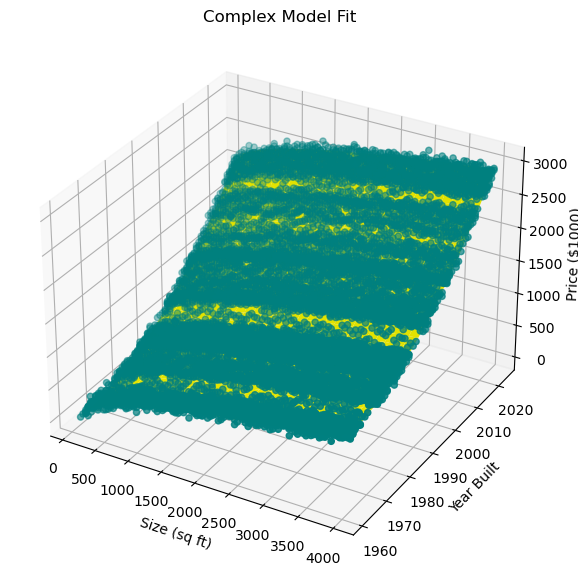

In [15]:
# Transform features for complex model
X1_transformed = np.sqrt(X1 - 100)
X2_transformed = (X2 - 1960) ** 2
X_complex = np.column_stack((np.ones(X1.shape), X1_transformed, X2_transformed))
w_complex = LinRegression(X_complex, Y)

# Compute MSE for both models
y_pred_linear = X_housing @ w_linear
y_pred_complex = X_complex @ w_complex
mse_linear = MSE(Y, y_pred_linear)
mse_complex = MSE(Y, y_pred_complex)

print(f"MSE for the Linear Model: {mse_linear:.2f}")
print(f"MSE for the Complex Model: {mse_complex:.2f}")

if mse_complex < mse_linear:
    print("Verdict: The complex model performs better with a lower MSE.")
else:
    print("Verdict: The linear model performs better with a lower MSE.")

# Plot complex model fit
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
Y_pred_complex = w_complex[0] + w_complex[1] * np.sqrt(X1_mesh - 100) + w_complex[2] * (X2_mesh - 1960) ** 2

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_mesh, X2_mesh, Y_pred_complex, color="yellow")
ax.scatter(X1, X2, Y, color="teal", marker='o', label="Actual Data")
ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Year Built')
ax.set_zlabel('Price ($1000)')
ax.set_title('Complex Model Fit')
plt.show()